## Polinomio auto regressivo
Se tem np polos, significa que precisa de np pontos anteriores.\
O $z^{-d}$ é o atraso de transporte \
Função custo possível:
$$J = MSE+\lambda\sum numero de parametros$$
## Estimador de Markov
Estimador dos minimos quadrados ponderados
$$J=[Y - \Phi\hat{\Theta}]^TW[Y - \Phi\hat{\Theta}]$$

In [1]:
import numpy as np
import seaborn as sb

In [2]:
y = np.arange(100)[::-1]+np.random.normal(size=100)
u = y*-1+np.random.normal(size=100)

In [3]:
n = 2
amostras = len(y)
Phi = np.column_stack((y[n-2:amostras-2],y[n-1:amostras-1],y[n:],u[n-2:amostras-2],u[n-1:amostras-1],u[n:]))
Phi.shape

(98, 6)

In [4]:
theta = np.linalg.inv(Phi.T.dot(Phi)).dot(Phi.T).dot(y[n:])
y_hat = np.sum(Phi*theta.T,axis=1)
np.sum((y_hat-y[n:])**2)

8.702693137299192e-19

In [5]:
def lsqrt_memoria(n, u, y):
    amostras = len(u)
    M = np.column_stack((y[n-2:amostras-2],y[n-1:amostras-1],y[n:],u[n-2:amostras-2],u[n-1:amostras-1],u[n:]))
    y = np.array(y)
    theta = np.linalg.inv(M.T.dot(M)).dot(M.T).dot(y[n:])
    y_hat = np.sum(M*theta.T,axis=1)
    return y_hat

In [6]:
y_hat = lsqrt_memoria(2,u,y)
np.sum((y[n:]-y_hat)**2)

8.702693137299192e-19

In [15]:
# Estimador dos mínimos quadrados não-recursivo (em batelada)
# Processo de segunda ordem (2 pólos e 2 zeros)
#Bibliotecas usadas
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

#Importa um arquivo com os dados de saída
with open('aula_03.csv','r') as f:
    data = np.loadtxt(f,delimiter=',')
    data = data[10:]

In [16]:
print('Método dos mínimos quadrados em batelada')
npts = data.size # O número de pontos existentes
u = np.arange(npts) # Como os dados são sequênciais, é gerado uma sequência de números
y = data # Salva os dados de saídas

Método dos mínimos quadrados em batelada


In [17]:
print(f'Número de pontos: {npts}')
na = 2
nb = 2
deep = max(na, nb)
numparametros = na+nb
phi = np.ones([npts, na+nb]) # Inicia a matriz Phi para 4 parametros

work_y = np.append([y[0]]*deep,y[1:])
work_u = np.append([u[0]]*deep,u[1:])

for j in range(npts): # Loop para preencher a matriz Phi
    new_phi = []
    for i in range(na):
        new_phi.append(-work_y[max(j-i,0)])
    for i in range(nb):
        new_phi.append(work_u[max(j-i,0)])
    phi[j] = new_phi

Número de pontos: 413


In [18]:
theta = np.linalg.inv(phi.T.dot(phi)).dot(phi.T).dot(y) # Calcula os parametros através de operações matriciais
print(theta)

[-1.36918164  0.40209787  0.46067814 -0.45538112]


In [19]:
# Inicia a matriz de valores n passos a frente para ser preenchida
yest_n = np.ones(npts)
yest_n[:deep] = y[:deep] # Preenche os n pontos iniciais
yest_1 = yest_n.copy() # Cria uma copia da matriz

# A partir do n ponto, calcula o valor da saída conforme os parametros estimados
yest_u_z = np.ones(numparametros)
y_u_z = np.ones(numparametros)

for t in range(deep,npts):

    for i in range(na):
        j = i+1
        yest_u_z[i] = -yest_n[t-j]

    for i in range(na):
        j = i+1
        y_u_z[i] = -y[t-j]

    for i in range(na,na+nb):
        j = i+1-na
        yest_u_z[i] = u[t-j]
        y_u_z[i] = u[t-j]
    # Previsão de n passos a frente
    # yest_n[t] = np.sum(theta*[-yest_n[t-1], -yest_n[t-2], u[t-1], u[t-2]])
    yest_n[t] = np.sum(theta*yest_u_z)

    # Previsão de um passo a frente
    # yest_1[t] = np.sum(theta*[-y[t-1], -y[t-2], u[t-1], u[t-2]])
    yest_1[t] = np.sum(theta*y_u_z)

# Mean Squared Error (MSE) – objetivo é um menor MSE
MSE_1 = np.sum((y-yest_1)**2)/(npts-deep)
MSE_n = np.sum((y-yest_n)**2)/(npts-deep)
print(f'MSE 1: {MSE_1}')
print(f'MSE n: {MSE_n}')

MSE 1: 17.042695885106184
MSE n: 431.645956470937


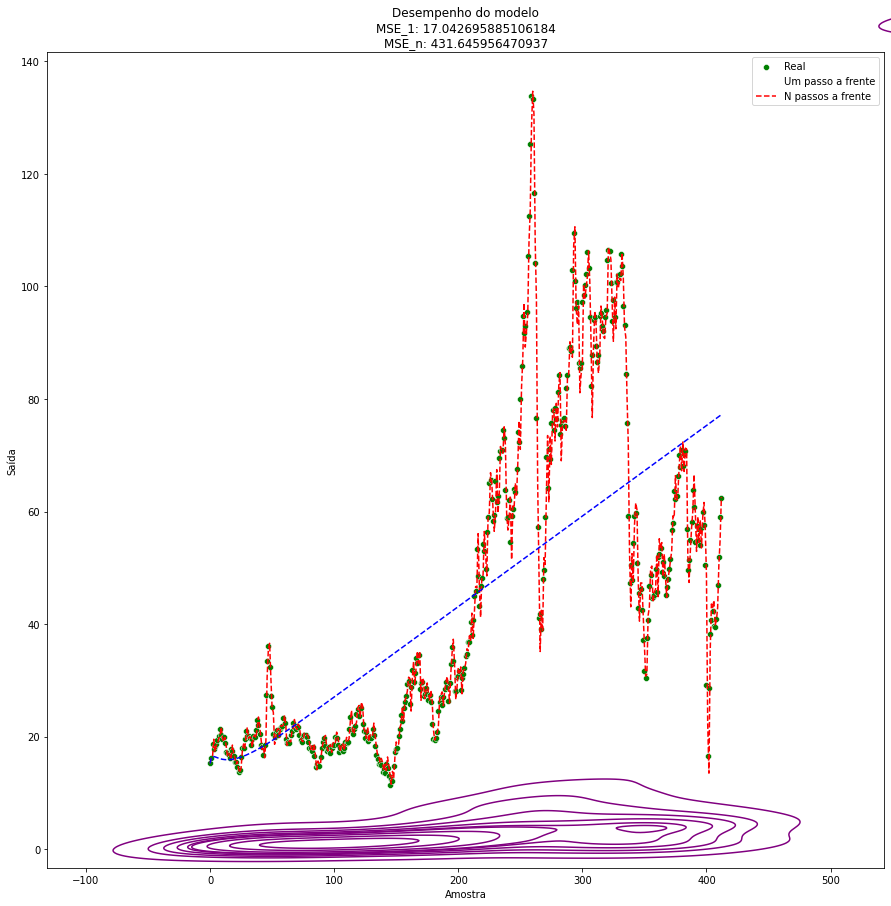

In [20]:
# Plota a figura
plt.figure(figsize = (15,15))
sb.scatterplot(x=u,y=y,color='green',markers='.')
sb.kdeplot(x=u,y=np.abs(y-yest_1),color='purple')
sb.lineplot(x=u,y=yest_1,color='red',linestyle='--')
sb.lineplot(x=u,y=yest_n,color='blue',linestyle='--')
plt.title(f'Desempenho do modelo\nMSE_1: {MSE_1}\nMSE_n: {MSE_n}')
plt.legend(labels=["Real","Um passo a frente","N passos a frente"])
plt.xlabel('Amostra')
plt.ylabel('Saída')
plt.show()
plt.close()